### Link to dataset : https://www.kaggle.com/datasets/vimpigro/handwritten-mongolian-cyrillic-characters-database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### If not using Google Drive, enter directory to dataset here

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Reshape
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/HMCC letters merged.csv', delimiter=',', header = None)

In [ ]:
df = df.to_numpy()

x,y = df[:,1:], df[:,0]

label_class = np.unique(y)

x = x.reshape((-1,28,28,1))/x.max()

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
train_Images, test_Images, train_Labels, test_Labels = train_test_split(x, y, test_size=0.3, random_state=29)
test_Images, validation_Images, test_Labels, validation_Labels = train_test_split(test_Images, test_Labels, test_size=0.5, random_state=56)

train_Images = train_Images.reshape((-1, 28, 28))
test_Images = test_Images.reshape((-1, 28, 28))
validation_Images = validation_Images.reshape((-1, 28, 28))

model = models.Sequential()

model.add(layers.SimpleRNN(64, activation='tanh', input_shape=(28, 28)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_class), activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history = model.fit(train_Images, train_Labels, epochs=15, validation_data=(validation_Images, validation_Labels),callbacks = my_callbacks)

Epoch 1/15
4020/4020 [==============================] - 36s 9ms/step - loss: 2.1551 - accuracy: 0.3713 - val_loss: 1.7369 - val_accuracy: 0.4812
Epoch 2/15
4020/4020 [==============================] - 32s 8ms/step - loss: 1.5836 - accuracy: 0.5290 - val_loss: 1.4250 - val_accuracy: 0.5713
Epoch 3/15
4020/4020 [==============================] - 33s 8ms/step - loss: 1.3909 - accuracy: 0.5837 - val_loss: 1.3313 - val_accuracy: 0.6026
Epoch 4/15
4020/4020 [==============================] - 35s 9ms/step - loss: 1.2814 - accuracy: 0.6178 - val_loss: 1.1956 - val_accuracy: 0.6433
Epoch 5/15
4020/4020 [==============================] - 33s 8ms/step - loss: 1.2035 - accuracy: 0.6397 - val_loss: 1.1428 - val_accuracy: 0.6578
Epoch 6/15
4020/4020 [==============================] - 35s 9ms/step - loss: 1.1537 - accuracy: 0.6555 - val_loss: 1.2379 - val_accuracy: 0.6345
Epoch 7/15
4020/4020 [==============================] - 32s 8ms/step - loss: 1.1137 - accuracy: 0.6678 - val_loss: 1.1853 - val_ac

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 35)                2275      
                                                                 
Total params: 12,387
Trainable params: 12,387
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc = model.evaluate(test_Images, test_Labels, verbose=2)

print('\nTest accuracy:', test_acc * 100 , "%")

y_pred = model.predict(test_Images)
y_pred_classes = np.argmax(y_pred, axis=1)

precision = precision_score(test_Labels, y_pred_classes, average='macro')
recall = recall_score(test_Labels, y_pred_classes, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score :", f1_score)

862/862 - 2s - loss: 1.1510 - accuracy: 0.6603 - 2s/epoch - 3ms/step

Test accuracy: 66.03294610977173 %
862/862 [==============================] - 3s 3ms/step
Precision:  0.6711764713508332
Recall:  0.6608981750173812
F1-Score : 0.6659976694845918


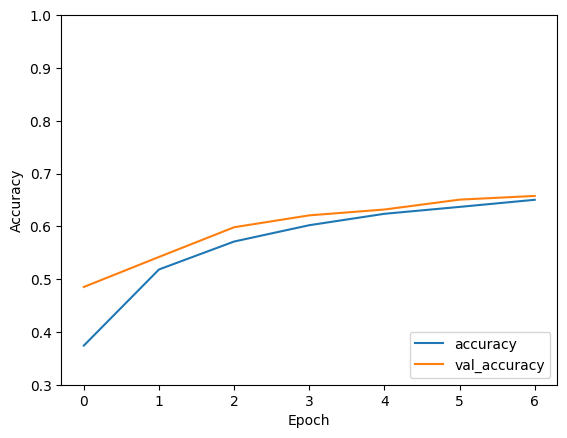

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

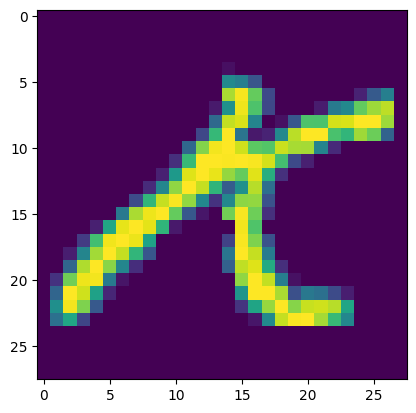

1/1 [==============================] - 0s 24ms/step


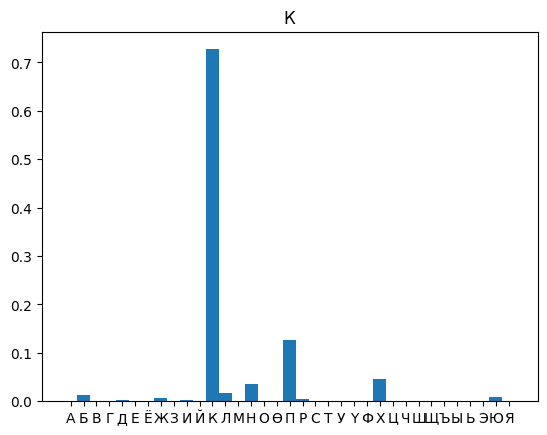

In [ ]:
i = np.random.randint(0,len(test_Labels))
class_names = [*'АБВГДЕЁЖЗИЙКЛМНОӨПРСТУҮФХЦЧШЩЪЫЬЭЮЯ']
# class_names = np.unique(y)
plt.imshow(test_Images[30])
# plt.title(class_names[test_Labels[i]])
plt.show()
def predict(index):
  prediction = model.predict(test_Images[index:index+1])[0]
  plt.bar(class_names,prediction,width=1)
  plt.title(class_names[test_Labels[30]])
  plt.show()
predict(30)

In [ ]:
x1=test_Images[30]
x1

In [ ]:
test_Labels[30]

In [ ]:
plt.imshow(x1)